In [1]:
%cd ..

/home/appuser/Grounded-SAM-2


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path

import requests
from PIL import Image

from src.user_interface.grounded_sam import SegmentReuqest
from src.utils.image import pil2base64

In [3]:
image_path = Path("tests/data/sample_image.png")
image = Image.open(image_path)
segment_request = SegmentReuqest(
    image_base64=pil2base64(image),
    text="product.",
)

In [4]:
segment_response = requests.post(
    url="http://localhost:8080/segment",
    json=segment_request.model_dump(),
)

In [19]:
import numpy as np
from PIL import Image

mask_ar = np.uint8(np.array(segment_response.json()["masks"]))

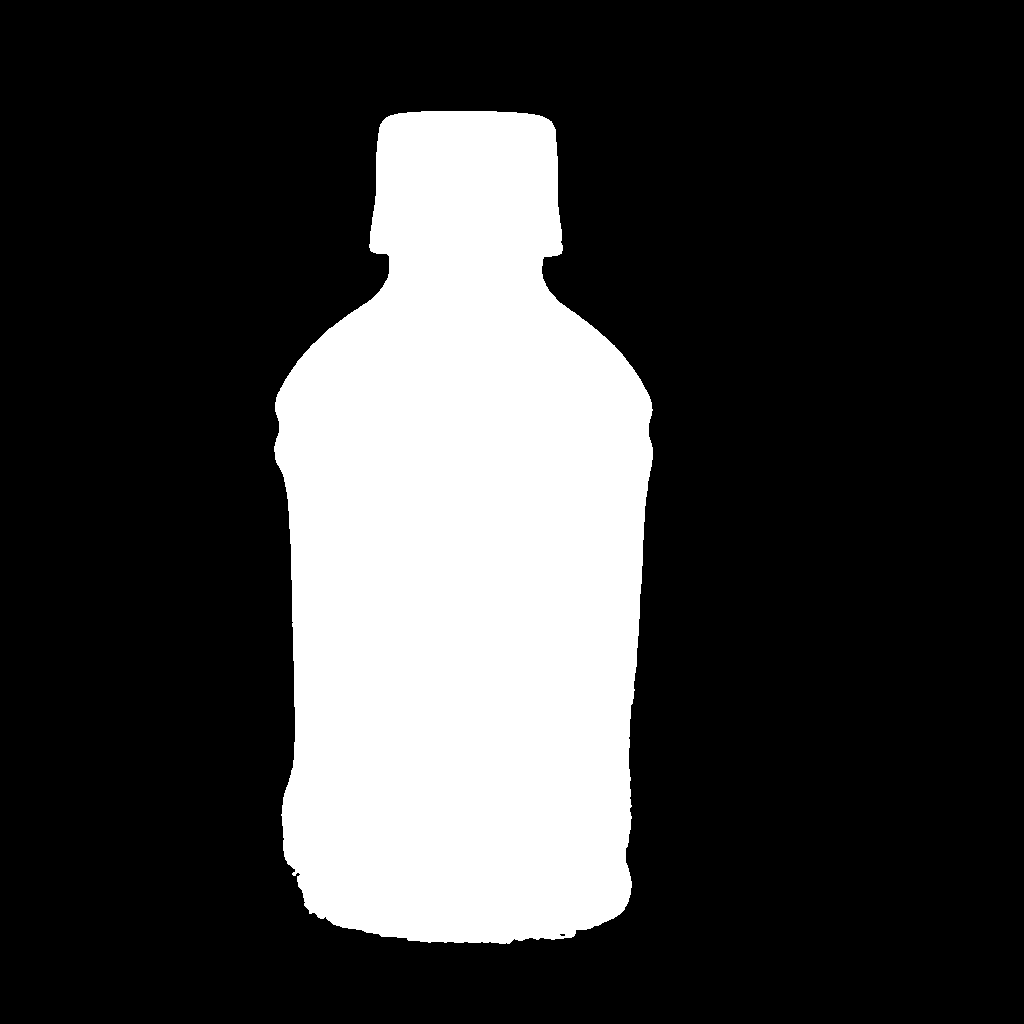

In [21]:
mask = Image.fromarray(mask_ar[0])
mask